In [394]:
import pandas as pd
import numpy as np
import seaborn as sns

In [395]:
df = pd.read_csv('https://raw.githubusercontent.com/brianlivian/AIM-5001/master/M11_Data%20(1).csv')

# Rename unnamed columns
df = df.rename(columns = {'Unnamed: 0' : 'Airline', 'Unnamed: 1': 'Status'})
df

,Airline,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


# 1.1

In [396]:
# melt dataframe into long dataframe by using 'Airline' and 'Status' as keys
long_df = df.melt(id_vars = ['Airline', 'Status'])

# rename 'variable' column to 'City', 'value' column to 'Count'
long_df = long_df.rename(columns = {'variable': 'City', 'value': 'Count'})

# replace rows with nan values in 'Status' column
long_df = long_df.dropna(subset = ['Status'])

# there is a nan value for every other row in 'Airline'
# replace nan value with preceding row for 'Airline'
long_df['Airline'].fillna(method='ffill', inplace = True)
long_df

,Airline,Status,City,Count
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
3,AMWEST,on time,Los Angeles,694.0
4,AMWEST,delayed,Los Angeles,117.0
5,ALASKA,on time,Phoenix,221.0
6,ALASKA,delayed,Phoenix,12.0
8,AMWEST,on time,Phoenix,4840.0
9,AMWEST,delayed,Phoenix,415.0
10,ALASKA,on time,San Diego,212.0
11,ALASKA,delayed,San Diego,20.0


In [397]:
type(long_df)

pandas.core.frame.DataFrame

# 1.2

Based on the analysis, Alaska performed better than Amwest for all 5 of the cities. However, the analysis on the overall performance shows that Amwest performed slightly better than Alaska. (I don't know how the analysis makes sense or where it goes wrong).



In [240]:
# Create groupby dataframe for flights
longdf_grouped1 = long_df.groupby(['Airline','Status', 'City']).sum()
longdf_grouped1

Count
Airline Status  City                 
ALASKA  delayed Los Angeles      62.0
                Phoenix          12.0
                San Diego        20.0
                San Francisco   102.0
                Seattle         305.0
        on time Los Angeles     497.0
                Phoenix         221.0
                San Diego       212.0
                San Francisco   503.0
                Seattle        1841.0
AMWEST  delayed Los Angeles     117.0
                Phoenix         415.0
                San Diego        65.0
                San Francisco   129.0
                Seattle          61.0
        on time Los Angeles     694.0
                Phoenix        4840.0
                San Diego       383.0
                San Francisco   320.0
                Seattle         201.0

In [414]:
# groupby dataframe for total of cities per airline
longdf_grouped2 = long_df.groupby(['Airline', 'City']).sum()
longdf_grouped2

Count
Airline City                 
ALASKA  Los Angeles     559.0
        Phoenix         233.0
        San Diego       232.0
        San Francisco   605.0
        Seattle        2146.0
AMWEST  Los Angeles     811.0
        Phoenix        5255.0
        San Diego       448.0
        San Francisco   449.0
        Seattle         262.0

In [415]:
# find percentage of delayed/ on time flights per airline per city
percentdf = (longdf_grouped1 / longdf_grouped2) * 100
# reset index to properly rename dataframe
percentdf = percentdf.reset_index()
percentdf = percentdf.rename(columns = {'Count': 'Percent'})
percentdf

,Airline,City,Status,Percent
0,ALASKA,Los Angeles,delayed,11.091234
1,ALASKA,Los Angeles,on time,88.908766
2,ALASKA,Phoenix,delayed,5.150215
3,ALASKA,Phoenix,on time,94.849785
4,ALASKA,San Diego,delayed,8.620690
5,ALASKA,San Diego,on time,91.379310
6,ALASKA,San Francisco,delayed,16.859504
7,ALASKA,San Francisco,on time,83.140496
8,ALASKA,Seattle,delayed,14.212488
9,ALASKA,Seattle,on time,85.787512


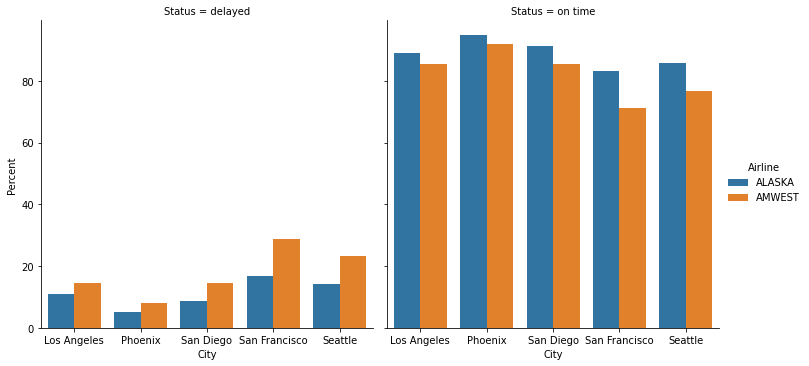

In [416]:
# plot graph showing on time/ delayed percentages per airline per city
sns.catplot(data = percentdf, kind = 'bar', x = 'City', y = 'Percent', hue = 'Airline', col = 'Status')

In [418]:
# find overall delayed/ on time count per airline (regardless of city)
longdf_grouped4 = long_df.groupby(['Airline','Status']).sum()
longdf_grouped4

Count
Airline Status         
ALASKA  delayed   501.0
        on time  3274.0
AMWEST  delayed   787.0
        on time  6438.0

In [419]:
# find total amount of flights per airline
longdf_grouped5 = long_df.groupby(['Airline']).sum()
longdf_grouped5

,Count
Airline,
ALASKA,3775.0
AMWEST,7225.0


In [420]:
# find percent of ovreall delayed/ on time flights per airline
overallpercent = (longdf_grouped4 / longdf_grouped5) * 100
# reset index to properly name dataframe
overallpercent = overallpercent.reset_index()
overallpercent = overallpercent.rename(columns ={'Count': 'Percent'})
overallpercent

,Airline,Status,Percent
0,ALASKA,delayed,13.271523
1,ALASKA,on time,86.728477
2,AMWEST,delayed,10.892734
3,AMWEST,on time,89.107266


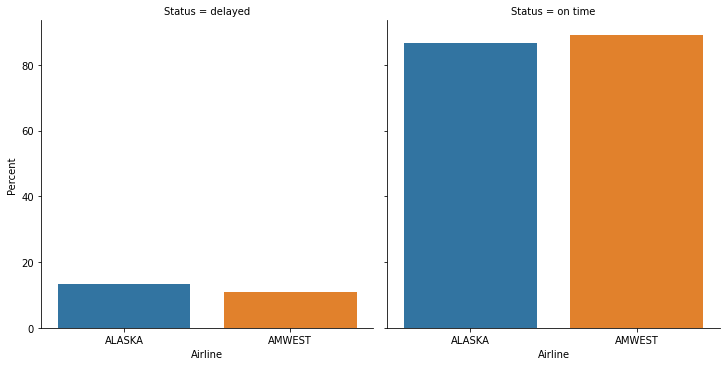

In [421]:
# display graph
sns.catplot(data = overallpercent, kind = 'bar', x = 'Airline', y = 'Percent', col = 'Status')

# 1.3

I would not present the data excatly as shown in the instructions. Rather, I would show the cities as rows, and the Airlines and Status as columns ( The transpose of the original dataset). I believe this is easier to read/ understand.

To make the long data frame into a wide data frame which is easier to understand to human, I use the unstack function. However, first I groupby the long_df by 'Airline', 'Status' and 'City'. Now I am able to pivot the data by the unstack() function. Finally, I take the tranpose of the dataframe.

In [359]:
longdf_grouped3 = long_df.groupby(['Airline','Status', 'City']).sum()
longdf_grouped3.unstack().T

Airline              ALASKA          AMWEST        
Status              delayed on time delayed on time
      City                                         
Count Los Angeles      62.0   497.0   117.0   694.0
      Phoenix          12.0   221.0   415.0  4840.0
      San Diego        20.0   212.0    65.0   383.0
      San Francisco   102.0   503.0   129.0   320.0
      Seattle         305.0  1841.0    61.0   201.0

# Part 2

In [9]:
df1 = pd.read_csv('https://raw.githubusercontent.com/brianlivian/AIM-5001/master/bridges.data.version1')
df1.columns = ['Identif', 'River', 'Location', 'Erected', 'Purpose', 'Length', 'Lanes', 'Clear-G', 'T-or-d', 'Material', 'Span', 'Rel-l', 'Type']
df1.head()

,Identif,River,Location,Erected,Purpose,Length,Lanes,Clear-G,T-or-d,Material,Span,Rel-l,Type
0,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
2,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
3,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
4,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


# 2.1

To create a dataframe that for each river, display the purpose, material and count, I use the groupby function. I group by river, then purpose, then material. Then, I use to .size() function to display the count of the materials. Finally, I convert the data into a dataframe, and rename the column to 'How Many?'

In [341]:
#df1.replace({'Length': {'?': np.nan}}, regex=False,inplace=True)
#df1['Length'] = pd.to_numeric(df1['Length'])

# create grouped data
df1_grouped = df1.groupby(['River', 'Purpose', 'Material']).size()
# convert to dataframe
df1_grouped = pd.DataFrame(df1_grouped)
# rename column
df1_grouped.columns = ['How Many?']
df1_grouped

How Many?
River Purpose  Material           
A     AQUEDUCT IRON              1
               WOOD              3
      HIGHWAY  ?                 1
               IRON              2
               STEEL            21
               WOOD              8
      RR       IRON              1
               STEEL             9
               WOOD              2
      WALK     STEEL             1
M     HIGHWAY  IRON              4
               STEEL            19
               WOOD              2
      RR       IRON              2
               STEEL            13
O     HIGHWAY  ?                 1
               IRON              1
               STEEL             9
      RR       STEEL             4
Y     HIGHWAY  STEEL             2
      RR       STEEL             1

# 2.2

To show the average length for each purpose/ material, I use the groupby function. I group by 'Purpose' then 'Material. To display the 'Length' column, I use ['Length'] after the groupby. To find the mean, I use the .mean() function. Finally, I convert the data to a dataframe, and rename the column to 'Average Length'.

In [342]:
# limit the grouping to the column 'Length' and take the mean
df1_grouped1 = df1.groupby(['Purpose', 'Material'])['Length'].mean()
# convert series to pd dataframe 
df1_grouped1 = pd.DataFrame(df1_grouped1)
# rename column
df1_grouped1.columns = ['Average Length']
df1_grouped1

Average Length
Purpose  Material                
AQUEDUCT IRON         1000.000000
         WOOD         1092.000000
HIGHWAY  ?                    NaN
         IRON         1216.666667
         STEEL        1557.804348
         WOOD         1053.375000
RR       IRON         1100.000000
         STEEL        1946.850000
         WOOD                 NaN
WALK     STEEL                NaN

# 2.3

To generate the average length, count, minimum length and maximum length of the bridges, I create a function called 'get_stats'. I modelled this function from the class notes. The function takes an input, and returns the average length, count, max length and min length. I create a variable called quartiles, which I obtain by using the pd.cut function. I create a new grouped dataframe called 'grouped', which is specific to length and is grouped by quartiles. Then, I create a new dataframe, grouped1, which is the dataframe of the output of get_stats(grouped). 


In [110]:
def get_stats(group):
    return {'Average Length': group.mean(), 'Count': group.count(), 'Max Length': group.max(), 'Min Length': group.min()}
            

In [343]:
# find quartiles of year erected
quartiles = pd.cut(df1.Erected, 4)

# create dataframe of lengths from df1, grouped by quartiles
grouped = df1.Length.groupby(quartiles)
# create dataframe from outputs of 'get_stats', which has an input from the newly made dataframe above
grouped1 = pd.DataFrame(get_stats(grouped))
grouped1

,Average Length,Count,Max Length,Min Length
Erected,,,,
"(1818.833, 1860.75]",1094.625000,8,1500.0,990.0
"(1860.75, 1902.5]",1603.347826,23,4558.0,1000.0
"(1902.5, 1944.25]",1676.181818,33,3000.0,860.0
"(1944.25, 1986.0]",1530.411765,17,3756.0,804.0
